In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
from src.cort_processor import *
from src.cort_processor_backup import *

from src.plotter import *
from src.filters import *
import math
import pickle
import scipy
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
from matplotlib.pyplot import cm
from scipy import signal
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from matplotlib import colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
import tdt 
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, iirnotch, filtfilt, resample, hilbert, welch
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft
from scipy.io import savemat

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
test_session = CortProcessor('/mnt/c/oobootoo/rat-fes/data/results-meplem923/meepo_fast_923')
test_session.process()

read from t=0s to t=384.32s
read from t=0s to t=367.29s


(array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,  20., ...,  40.,   0.,  20.],
        ...,
        [ 80.,   0.,  40., ...,  20.,  80.,   0.],
        [  0.,  40.,  20., ...,  20.,  20.,   0.],
        [ 20.,  60.,  80., ..., 200.,  80.,  40.]]),
 array([[ 57.04570981,  68.52154199,  99.700727  , ...,  85.96389651,
          75.35382826, 116.93322321],
        [ 36.4996488 ,  51.9334805 , 108.95429378, ...,  60.71062409,
          80.37769212,  94.83433549],
        [ 19.54975274,  49.76222537,  98.11528124, ...,  75.31351158,
          78.8937292 , 107.27672204],
        ...,
        [ 52.22852793,  78.35555014,  99.29736362, ...,  59.51694951,
          68.70136091,  99.38576458],
        [ 47.31020006,  70.14428143,  99.58226833, ...,  48.56430178,
          75.6090886 ,  89.48683408],
        [ 47.67175786,  64.09552069,  99.79731245, ...,  49.29364425,
          83.22919592,  91.97206143]]))

In [3]:
test_pred, test_act, testr2 = test_session.decode_phase()
test_tsf = np.linspace(0, (test_act.shape[0]*50)/1000,test_act.shape[0])

In [4]:
print(test_session.data["rates"][1][:,0])

[60. 20.  0. ... 80.  0. 20.]


In [5]:
rates_unformat = np.vstack((test_session.data["rates"][0],test_session.data["rates"][1]))

In [6]:
print(rates_unformat.shape)
print(np.mean(rates_unformat, axis = 0))
tdt_index = np.flip(np.array([1,3,5,7,2,4,6,8,
                      10,12,14,16,9,11,13,15,
                      26,28,30,32,25,27,29,31,
                      17,19,21,23,18,20,22,24]) -1)
print(tdt_index)
sorted_uformat = rates_unformat[:,tdt_index]
print(sorted_uformat[:,1])
print(rates_unformat[:,2])
means_tmp = np.mean(rates_unformat, axis = 0)
means_tmp_sorted = means_tmp[tdt_index]
means_tmp_sorted = np.reshape(means_tmp_sorted, (4,8))
print(means_tmp_sorted)

(13709, 32)
[43.42111022 36.19082355 50.20351594 35.63790211 41.92136553 46.72842658
 41.77985265 35.7750383  42.25399373 35.81005179 42.54577285 35.47158801
 40.95849442 42.85359982 39.95623313 40.80239259 39.56233132 34.62980524
 45.86913706 36.14851557 39.82930921 37.40900139 33.89743964 34.45765555
 35.67875119 36.84732657 36.02013276 37.92545043 37.09679772 41.57268947
 36.58034868 36.49135604]
[23 21 19 17 22 20 18 16 30 28 26 24 31 29 27 25 14 12 10  8 15 13 11  9
  7  5  3  1  6  4  2  0]
[ 0.  0.  0. ... 20. 20. 80.]
[ 0.  0. 20. ... 40. 20. 80.]
[[34.45765555 37.40900139 36.14851557 34.62980524 33.89743964 39.82930921
  45.86913706 39.56233132]
 [36.58034868 37.09679772 36.02013276 35.67875119 36.49135604 41.57268947
  37.92545043 36.84732657]
 [39.95623313 40.95849442 42.54577285 42.25399373 40.80239259 42.85359982
  35.47158801 35.81005179]
 [35.7750383  46.72842658 35.63790211 36.19082355 41.77985265 41.92136553
  50.20351594 43.42111022]]


In [7]:
rates, _ = test_session.stitch_and_format(test_session.data['rates'], test_session.data['angles'])

In [8]:
print(rates.shape)

(13689, 320)


<AxesSubplot:>

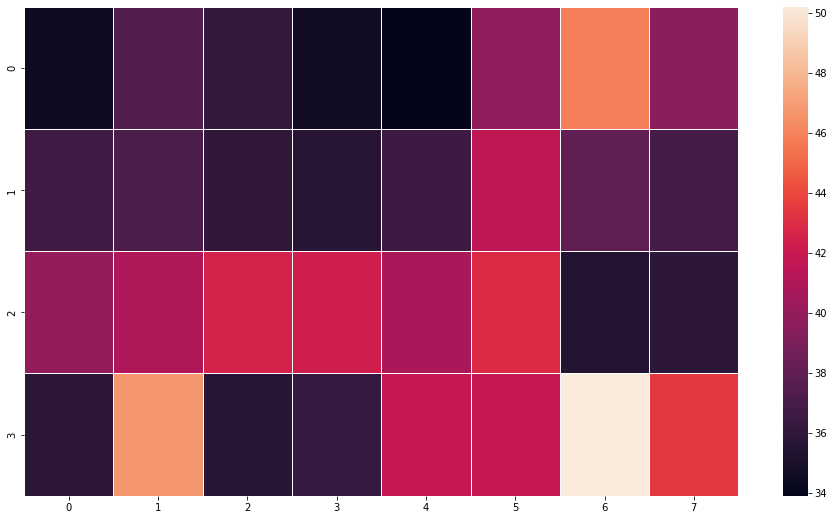

In [12]:
%matplotlib inline
plt.figure(figsize=(16,9))
sns.heatmap(means_tmp_sorted, linewidth=0.5)


In [10]:
fig, ax = plt.subplots()
sns.heatmap(ax=ax, means_tmp_sorted,ax=ax)

SyntaxError: positional argument follows keyword argument (<ipython-input-10-f4ecc04de551>, line 2)

In [ ]:
tt = np.arange(1,33)
print(tt)